# 東京都新型コロナウイルス感染症の曜日別の新規感染者数  

In [1]:
# インポート
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib          # 日本語表示に対応
import numpy as np
import pandas as pd

# 東京都の新型コロナウイルス感染症情報

In [2]:
# URLからデータセットを読み込む
url = "https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv"
data = pd.read_csv(url)
data.head()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,確定_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_接触歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,NaN,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,NaN,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,NaN,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,NaN,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,NaN,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
# 最新データの確認
data.tail()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,確定_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_接触歴の有無フラグ,備考,退院済フラグ
117512,116629,130001,東京都,NaN,2021-03-21,NaN,NaN,NaN,50代,女性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117513,116630,130001,東京都,NaN,2021-03-21,NaN,NaN,NaN,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117514,116631,130001,東京都,NaN,2021-03-21,NaN,NaN,NaN,50代,女性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117515,116632,130001,東京都,NaN,2021-03-21,NaN,NaN,NaN,30代,男性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117516,116633,130001,東京都,NaN,2021-03-21,NaN,NaN,NaN,60代,男性,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# データ型の確認
data.dtypes

No                int64
全国地方公共団体コード       int64
都道府県名            object
市区町村名           float64
公表_年月日           object
発症_年月日           object
確定_年月日           object
患者_居住地           object
患者_年代            object
患者_性別            object
患者_職業            object
患者_状態           float64
患者_症状           float64
患者_渡航歴の有無フラグ    float64
患者_接触歴の有無フラグ    float64
備考              float64
退院済フラグ          float64
dtype: object

In [7]:
# 必要なデータの整理
# data_week = data.loc[139:, ['No', '公表_年月日', '曜日']]
data_week = data.loc[139:, ['No', '公表_年月日']]
data_week.head()

,No,公表_年月日
139,139,2020-03-23
140,140,2020-03-23
141,141,2020-03-23
142,142,2020-03-23
143,143,2020-03-23


In [8]:
# 公表_年月日ごとの新規感染者数の小計を取る
data_count = data_week.groupby('公表_年月日').size()
data_count.head()

公表_年月日
2020-03-23    16
2020-03-24    18
2020-03-25    41
2020-03-26    46
2020-03-27    40
dtype: int64

In [9]:
# 曜日ごとのデータにする
data_mon = data_count[::7]
data_tue = data_count[1::7]
data_wed = data_count[2::7]
data_thu = data_count[3::7]
data_fri = data_count[4::7]
data_sat = data_count[5::7]
data_sun = data_count[6::7]
data_mon.head()

公表_年月日
2020-03-23     16
2020-03-30     12
2020-04-06     85
2020-04-13    100
2020-04-20    101
dtype: int64

In [10]:
week = len(data_mon)
week

41

In [11]:
# グラフ用変数の設定
# t = np.arange(0, week, 1)
t = data_mon.index
y1 = data_mon.values
y2 = data_tue.values
y3 = data_wed.values
y4 = data_thu.values
y5 = data_fri.values
y6 = data_sat.values
y7 = data_sun.values

c1,c2,c3,c4,c5,c6,c7 = "red","orange","yellow","green","blue","purple","pink"      # 各プロットの色
l1,l2,l3,l4,l5,l6,l7 = "月","火","水","木","金","土","日"   # 各ラベル

In [12]:
# 行数がweekに満たないデータにはNoneを付加する
if len(y7) < week:
    y7 = np.append(y7, None)
    if len(y6) < week:
        y6 = np.append(y6, None)
        if len(y5) < week:
            y5 = np.append(y5, None)
            if len(y4) < week:
                y4 = np.append(y4, None)
                if len(y3) < week:
                    y3 = np.append(y3, None)
                    if len(y2) < week:
                        y2 = np.append(y2, None)

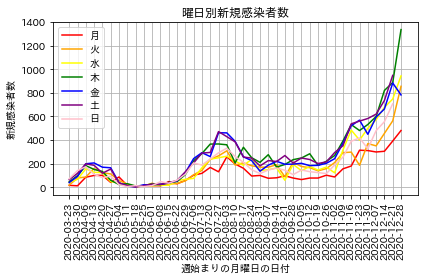

In [13]:
# 曜日ごとのグラフ描画
fig, ax = plt.subplots()

ax.set_xlabel('週始まりの月曜日の日付')  # x軸ラベル
ax.set_ylabel('新規感染者数')  # y軸ラベル
ax.set_title('曜日別新規感染者数') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(t, y1, color=c1, label=l1)
ax.plot(t, y2, color=c2, label=l2)
ax.plot(t, y3, color=c3, label=l3)
ax.plot(t, y4, color=c4, label=l4)
ax.plot(t, y5, color=c5, label=l5)
ax.plot(t, y6, color=c6, label=l6)
ax.plot(t, y7, color=c7, label=l7)
ax.legend(loc=0)    # 凡例
plt.xticks(rotation=90)     # x軸の文字を90度回転
fig.tight_layout()  # レイアウトの設定（保存の直前に入れて調整）
plt.savefig('week.png', dpi=300) # 画像の保存
plt.show()

In [14]:
# 日別のデータ
t = data_count.index
y = data_count.values

In [15]:
x = np.array([2,3,4,5,6])
i=1
np.mean(x[(i-1):4])
x[i-1:len(x)]
x[len(x)-1]

6

In [16]:
y_mean7 = np.zeros(len(y))
for i in range(6, len(y)):
    y_mean7[i] = np.mean(y[i-6:i+1])

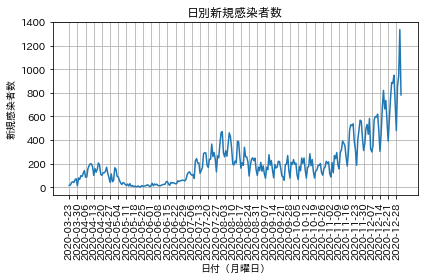

In [17]:
# 日ごとのグラフ描画
fig, ax = plt.subplots()

ax.set_xlabel('日付（月曜日）')  # x軸ラベル
ax.set_ylabel('新規感染者数')  # y軸ラベル
ax.set_title('日別新規感染者数') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(t, y)
# ax.legend(loc=0)    # 凡例
ax.set_xticks(data_count[::7].index)
plt.xticks(rotation=90)     # x軸の文字を90度回転
fig.tight_layout()  # レイアウトの設定（保存の直前に入れて調整）
plt.savefig('daily.png', dpi=300) # 画像の保存
plt.show()

In [5]:
pd.set_option('display.max_rows', 100)
print(data)

No  全国地方公共団体コード 都道府県名  市区町村名      公表_年月日 曜日  発症_年月日  患者_居住地 患者_年代  \
0          1       130001   東京都    NaN  2020-01-24  金     NaN  湖北省武漢市   40代   
1          2       130001   東京都    NaN  2020-01-25  土     NaN  湖北省武漢市   30代   
2          3       130001   東京都    NaN  2020-01-30  木     NaN  湖南省長沙市   30代   
3          4       130001   東京都    NaN  2020-02-13  木     NaN      都内   70代   
4          5       130001   東京都    NaN  2020-02-14  金     NaN      都内   50代   
...      ...          ...   ...    ...         ... ..     ...     ...   ...   
22163  22060       130001   東京都    NaN  2020-09-09  水     NaN     NaN   20代   
22164  22061       130001   東京都    NaN  2020-09-09  水     NaN     NaN   30代   
22165  22062       130001   東京都    NaN  2020-09-09  水     NaN     NaN   70代   
22166  22063       130001   東京都    NaN  2020-09-09  水     NaN     NaN   40代   
22167  22064       130001   東京都    NaN  2020-09-09  水     NaN     NaN   30代   

      患者_性別  患者_属性  患者_状態  患者_症状  患者_渡航歴の有無フラグ  備考  退院済フラグ  


# 都道府県別新型コロナウイルス感染症情報

In [12]:
# URLからデータセットを読み込む
url = "https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv"
df_jj = pd.read_csv(url)
df_jj.head()

,通し,厚労省NO,無症状病原体保有者,国内,チャーター便,年代,性別,確定日,発症日,受診都道府県,...,Field4,Field5,Field6,Field7,Field8,Field9,Field10,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,1,1,NaN,A-1,NaN,30,男性,1/15/2020,1/3/2020,神奈川県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,A-2,NaN,40,男性,1/24/2020,1/14/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,A-3,NaN,30,女性,1/25/2020,1/21/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,A-4,NaN,40,男性,1/26/2020,1/23/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,A-5,NaN,40,男性,1/28/2020,1/22/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 最新データの確認
df_jj.tail()

,通し,厚労省NO,無症状病原体保有者,国内,チャーター便,年代,性別,確定日,発症日,受診都道府県,...,Field4,Field5,Field6,Field7,Field8,Field9,Field10,Unnamed: 51,Unnamed: 52,Unnamed: 53
107148,107149,NaN,NaN,NaN,NaN,70,男性,11/11/2020,11/5/2020,三重県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107149,107150,NaN,NaN,NaN,NaN,30,男性,11/11/2020,11/6/2020,三重県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107150,107151,NaN,NaN,NaN,NaN,40,男性,11/11/2020,11/4/2020,三重県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107151,107152,NaN,NaN,NaN,NaN,50,男性,11/11/2020,11/3/2020,三重県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107152,107153,NaN,NaN,NaN,NaN,90,女性,11/11/2020,11/11/2020,千葉県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# データ型の確認
df_jj.dtypes

通し                    int64
厚労省NO                object
無症状病原体保有者            object
国内                   object
チャーター便               object
年代                   object
性別                   object
確定日                  object
発症日                  object
受診都道府県               object
居住都道府県               object
居住管内                 object
居住市区町村               object
キー                   object
発表                   object
都道府県内症例番号            object
市町村内症例番号             object
ステータス                object
備考                   object
ソース                  object
ソース2                 object
ソース3                 object
人数                    int64
累計                   object
前日比                  object
発症数                  object
死者合計                float64
退院数累計               float64
退院数                 float64
PCR検査実施人数           float64
PCR検査前日比            float64
職業_正誤確認用             object
勤務先_正誤確認用            object
Hospital Pref        object
Residential Pref     object
Release             

In [19]:
# 必要なデータの整理
df_jj = data.loc[:, ['通し','年代','性別','確定日','居住都道府県','都道府県内症例番号']]
df_jj.head()

,通し,年代,性別,確定日,居住都道府県,都道府県内症例番号
0,1,30,男性,1/15/2020,神奈川県,1
1,2,40,男性,1/24/2020,中華人民共和国,1
2,3,30,女性,1/25/2020,中華人民共和国,2
3,4,40,男性,1/26/2020,中華人民共和国,1
4,5,40,男性,1/28/2020,中華人民共和国,2


# 生データのprofile reportの作成

In [5]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'